# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
# Importando as Bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
# Conectando com a base de dados
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

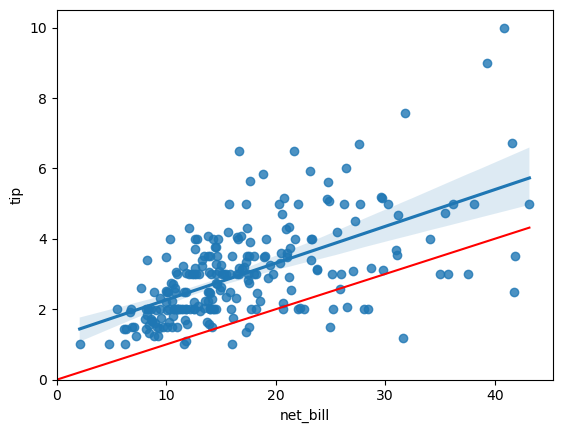

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [4]:
# Aplicando o Modelo de regressão linear simples pelo stats models
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           5.02e-23
Time:                        20:19:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 0.505398619388979)

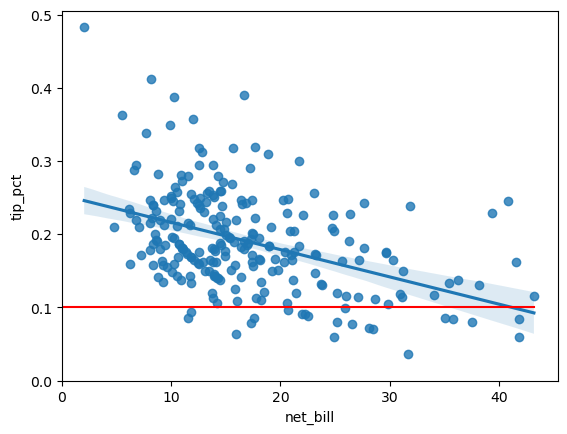

In [5]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1 + 0 * x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [6]:
# Aplicando o Modelo de regressão linear simples pelo stats models
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           1.52e-06
Time:                        20:19:50   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [7]:
tips[['tip', 'tip_pct', 'net_bill']].corr()

,tip,tip_pct,net_bill
tip,1.000000,0.241572,0.576663
tip_pct,0.241572,1.000000,-0.302144
net_bill,0.576663,-0.302144,1.000000


* **No primeiro gráfico** há uma boa correlação positiva, pois o valor da gorjeta (**tip**) varia em função do valor pago sem a  gorjeta (**net_bill**), o que não ocorre no **segundo gráfico** quando a gorjeta é em percentual (**tip_pct**), situação de leve queda a medida que o valor pago sem a gorjeta cresce.
* Comparando os $R^2$s, a **segunda regressão linear** é a que apresenta o pior desempenho, abaixo de 0,10 em função do maior distanciamento dos pontos em relação a reta da regressão linear.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
dados_novos = tips.copy()
dados_novos.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [9]:
# 1) predição de dados novos
dados_novos['tip_pct'] = reg.fittedvalues
dados_novos.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.207087,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.251951,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.197684,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.180107,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.176358,20.98


In [10]:
# 2) tip como tip_pct * net_bill
dados_novos['tip'] = dados_novos['tip_pct'] * dados_novos['net_bill']
dados_novos.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,3.309254,Female,No,Sun,Dinner,2,0.207087,15.98
1,10.34,2.186938,Male,No,Sun,Dinner,3,0.251951,8.68
2,21.01,3.461450,Male,No,Sun,Dinner,3,0.197684,17.51
3,23.68,3.668785,Male,No,Sun,Dinner,2,0.180107,20.37
4,24.59,3.699998,Female,No,Sun,Dinner,4,0.176358,20.98


In [11]:
# 3) 𝑅2 do modelo para tip
# Aplicando o Modelo de regressão linear simples pelo stats models
reg = smf.ols('tip ~ net_bill', data = dados_novos).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     99.74
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           6.88e-20
Time:                        20:20:00   Log-Likelihood:                -192.63
No. Observations:                 244   AIC:                             389.3
Df Residuals:                     242   BIC:                             396.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2819      0.079     28.704      0.000       2.125       2.438
net_bill       0.0427      0.004      9.987      0.000       0.034       0.051
==============================================================================
Omnibus:                       97.034   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.025
Skew:                          -1.782   Prob(JB):                     5.74e-62
Kurtosis:                       6.878   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 4.893119146541372)

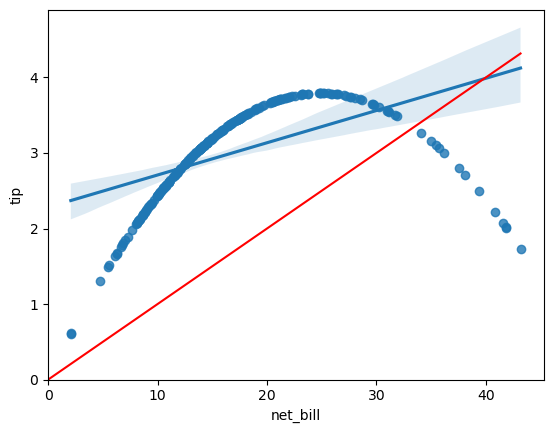

In [12]:
# 4) compare esse 𝑅2 com o do item 1

# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = dados_novos[dados_novos['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,dados_novos['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

#### Análise:
* Comparando os $R^2$s:
* Em comparação como o **item 1**, há uma ligeira queda do $R^2$ desta última análise após o ajuste do modelo, refletindo a leve queda no **tip_pct** a medida que o **net_bill** cresce. O peso do crescimento do **net_bill** sobre o valor do **tip** apresenta desacelaração até o momento em que há uma inversão, passando para queda no valor do **tip**.  